# Desafio 1: Multiplicación de enteros muy grandes
## Realizado por: John Faber Flórez Vasco
## Curso: Análisis de Algoritmos

Cada vez que queremos recurrer a realizar una múltipicación, recurrimos a la forma básica que aprendemos en la escuela, por lo cual estamos tan acostumbrados a realizarlo que dificulmente nos surge las siguientes preguntas:

- **¿Qué tan optimo a nivel computacional es este procedimiento?**
- **¿Pódemos Mejorarlo?**

Para poder ejemplificar las diferencias entre el algoritmo clásico y el **algoritmo de Karatsuba**, utilizaremos como medida de complejidad la **cantidad de operaciones elementales (dígito a dígito) realizadas en cada algoritmo**

Los algoritmos que se van a evualar será haciendo uso del lenguaje de programación **Julia**

## Algoritmo Clásico de Multiplicación

Este consiste en tener dos números, ubicar uno debajo del otro acomando las columnas de las unidades decenas centenas y posteriormente cada uno de los dígitos de abajo se múltiplica por los dígitos de arriba, teniendo cuidado en acomodar las columnas de manera correcta **llevando acarreo** y al final realizando la suma Por ejemplo:
![alt text](https://github.com/JohnFlorez25/Analisis_Algoritmos_2019_1/blob/master/Desafios/imagenes/multiplicacion.PNG)

**A nivel de algoritmo el procedimiento sería el siguiente:**

In [2]:
#Función para multiplicar dos números enteros.
function multiplicacion(x,y)
    m = x * y;
    return m;
end
multiplicacion(9876,1234)

12186984

No es importante el valor, sino, calcular cuantas multiplicaciones se realizaron para poder llegar a este resultado. Si analizamos cada uno de los dígitos de abajo se multiplica por cada uno de los múltiplos de arriba. Quiere decir que cada dígito de abajo realiza **4 multiplicaciones** _4 operaciones dígito a dígito_ lo que quiere decir que se van a realizar en total **16 operaciones dígito a dígito**. 

En este orden de días si tuvieramos dos números de 5 dígitos el total de operaciones serían **5 x 5 = 25** si fueran de 6 dígitos **6 x 6 = 36**, lo cual quiere decir que si tengo un número de n dígitos arriba y un dígito de n dígitos abajo la cantidad de operaciones a realizar sería $$n^2$$visualmente el costo computacional sería el siguiente:

In [3]:
using Plots

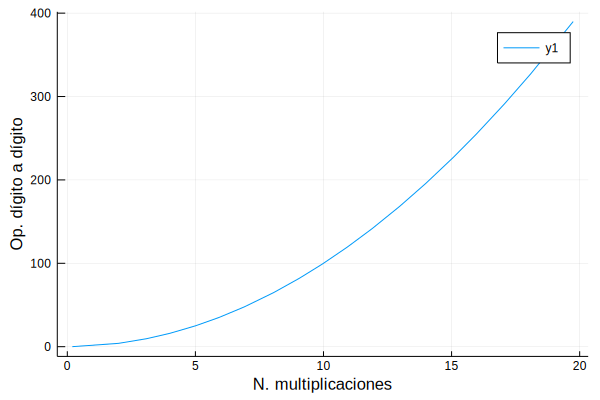

In [115]:
f(n)=n^2;
plot(f,0,20)
xlabel!("N. multiplicaciones")
ylabel!("Op. dígito a dígito")

**Graficando teniendo en cuenta el algoritmo clásico**

{Cantidad de múltiplicaciones}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
{Cantidad de operaciones dígito a dígito}
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


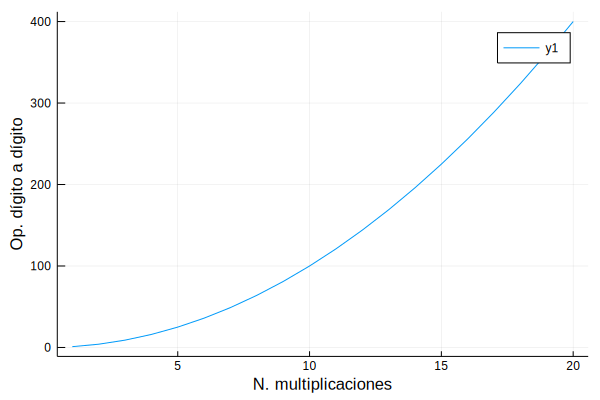

In [114]:
#Función para multiplicar n * n;
function multiplicacion(n)
    m = n * n;
    return m;
end

# Número de veces que se ejecuta el algoritmo
x = 20;
# Vector para guardar la cantidad de operaciones dígito a dígito realizadas
v = [];
# Vector para guardar la cantidad de veces que se ejecuta el algoritmo
w = [];
w = collect(1:x)
for i = 1:x
    v = push!(v,multiplicacion(i));
end
println("{Cantidad de múltiplicaciones}\n",w)
println("{Cantidad de operaciones dígito a dígito}\n",Int.(v))
plot(w,Int.(v))
xlabel!("N. multiplicaciones")
ylabel!("Op. dígito a dígito")

## Algoritmo de Karatsuba

Para superar el algoritmo clásico, debemos encontrar una forma de reducir **la multiplicación original** no a cuatro sino a **tres multiplicaciones de números de tamaño mitad**. Este algortimo hace uso de la técnica **Divide y vencerás**

El siguiente algoritmo pertenece a Anatolii Karatsuba, para multiplicar dos números de n dígitos. Vamos a ver el siguiente ejemplo multiplicando dos números de 4 dígitos (x=9876 , y=1234). Se debe tener en cuenta las siguientes reglas:

1. Partir a la mitad el primer número.
$$ x_{1} = 98 $$
$$ x_{0} = 76 $$
**Donde respectivamente x tendría el valor de:**
$$ x = x_{1} * (10^{2}) + x_{0} $$

2. Partir a la mitad el segundo número.
$$ y_{1} = 12 $$
$$ y_{0} = 34 $$
**Donde respectivamente x tendría el valor de:**
$$ y = y_{1} * (10^{2}) + y_{0} $$

3. Producto entre X0 y Y0 va a Z0 
$$ z_{0} = x_{0} * y_{0} $$

4. Producto entre X1 y Y1 va a Z2 
$$ z_{2} = x_{1} * y_{1} $$

5. Para calcular z1 debe MULTIPLICAR la suma entre X1+Y1 por la suma entre X0+Y0 y a esto le restamos Z2 y Z0
$$ z_{1} = (x_{1}+y_{1}) * (x_{0}+y_{0}) - z_{0} - z_{2} $$
6. Y el número final se obtiene realizando la siguiente ecuación:
$$ x*y = z_{2}*(100)^{2} + z_{1}*(100) + z_{0}$$

**Nuestro sistema de ecuaciones sería el siguiente:**
$$ x = 98 * (100) + 76 = 9.876 $$
$$ y = 12 * (100) + 34 = 1.234 $$
$$ z_{0} = (76) * (34) = 2.584 $$
$$ z_{1} = (174) * (46) - 2584 - 1176 = 4.244$$
$$ z_{2} = (98) * (12) = 1176 $$
$$ x*y   = 1176*(100)^{2} + (4.244)*(100) + 2.584 = 12.186.984$$

Ahora lo importante es analizar cuantas operaciones dígito a dígito realicé: si observamos en Zo tenemos 2 dígitos por 2 dígitos obteniendo **4 operaciones dígito a dígito** en Z2 sucede igual obteniendo otras 4 operaciones dígito a dígito, para z1 tenemos 3 dígitos por 2 dígitos lo cual nos da un total de **6 operaciones dígito a dígito** quiere decir que el total de operaciones que realizamos fueron:
$$ OP = 4 + 4 + 6 = 14 $$

Dando como resultado 14 operaciones dígito a dígito, **efectivamente vemos una mejora de 2 operaciones menos respecto a el algoritmo clásico donde efectuamos 16 operaciones dígito a dígito**

**A continuación presentamos el algoritmo para calcular la múltiplicacion de n dígitos:**

**IMPORTANTE: se puede simplificar aún más el algoritmo haciendo uso de DIV y MOD y evidenciar las tres multiplicaciones que se realizan dígito a dígito**

In [131]:
##Función para realizar multiplicación con algoritmo de Karatsuba.
function multK(u,v)
    #Variable para obtener el número con mayor cantidad de dígitos
    n = Int(max(length(digits(u)),length(digits(v))));
    #Variable para elevar la potencia de diez de acuerdo 
    #a la mitad de n
    s = n / 2;
    w = Int(div(u,(10^s)));
    x = u%(10^s);
    y = Int(div(v,(10^s)));
    z = v % (10^s);
    r = mult(w+x,y+z);
    p = mult(w,y);
    q = mult(x,z);
    #prod = p*(10^(2*s))+(r-p-q)*(10^2)+q;
    return p*(10^(2*s))+(r-p-q)*(10^2)+q
end

result=multK(9876,1234);

Int(result)



12186984

Teniendo en cuenta este resultado la pregunta clave es **¿Merece la pena efectuar cuatro sumas más para ahorrar una multiplicación?** la respuesta es negativa cuando se **multiplican números pequeños como los de nuestro ejemplo**. Sin embargo, merece la pena cuando los números que hay que multiplicar **son grandes**, y cada vez más cuanto mayores sean los números. Cuando los operandos son grandes, el tiempo requerido para la suma es despeciable frente al tiempo que requiere una sola multiplicación.

Según esto estaríamos reduciendo el costo computacional a un **25%** donde es notable el tiempo requerido para granes multiplicaciones en ello nuestro ahorro va ser significativamente mayor.

Supongamos que se quieren multiplicar dos números de 20 dígitos cada uno, en el **algoritmo clásico tendríamos que realizar 400 multiplicaciones dígito a dígito** lo cual es muy engorroso.

Sin embargo, si aplicamos el **algoritmo de Karatsuba** cada uno de los números se dividen en dos bloques de 10 dígitos y multiplicar utilizando este algoritmo reduce a grandes rasgos el número total de multiplicaciones asi:

- Multiplicar 10 por 10 nos da 100 operaciones dígito a dígito.
- El otro bloque nos genera otras 100 operaciones dígito a dígito.

Según el ejemplo que vimos calcular Zo y y Z2 resulta siendo muy sencillo

**EL PEOR DE LOS CASOS** es que Z1 sean números de 11 dígitos.

- Donde al multiplicar 11 * 11 obtendríamos 121 operaciones dígito a dígito.

**En total se realizarían 321 operaciones dígito a dígito**

Si se realiza el **análisis asintótico** de Karatsuba podemos observar que el número de multiplicaciones dígito a dígito para poder realizar la multiplicaciones de dos números de n dígitos sería:

$$n^{log_{2}(3)} \approx n^{1.58}$$

**Si aplicamos Karatsuba recursivamente disminuimos aún más la cantidad de multiplicaciones realizadas.**

visualmente el costo computacional del algoritmo de karatsuba en relación con el algortimo clásico sería el siguiente:

In [97]:
using Plots

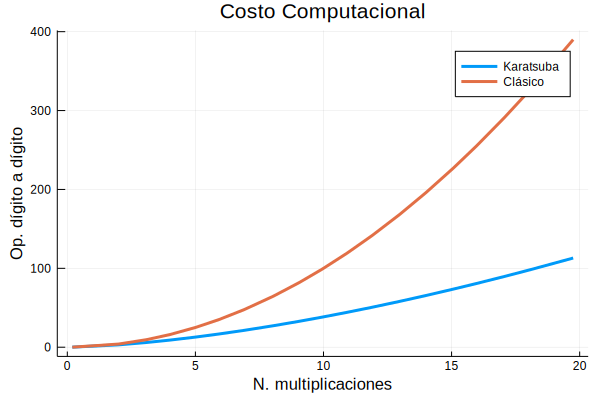

In [117]:
f(n)=n^log2(3);
g(n)=n^2;
plot(f,0,20,title="Costo Computacional", label="Karatsuba", lw = 3)
plot!(g,0,20, label="Clásico", lw = 3)
xlabel!("N. multiplicaciones")
ylabel!("Op. dígito a dígito")

## Conclusiones

1. Se debe garantizar y validar en el algoritmo que N sea lo suficiente grande para usar el algoritmo de divide y venceras, sino resulta siendo más lento que el algoritmo clásico.
2. La mejor forma de garantizar que el algoritmo implementado usando divide y vencerás se efectue hasta que n sea lo suficientemente pequeño para tratar con el algoritmo clásico.
3. La clave de la ejecución del algoritmo planteado esta en la recursividad.
4. El algorítmo es óptimo cuando los dos números son de tamaño de n dígitos, al existir un número con dígitos N o y otro número con dígitos M y difiere en más de un factor 2, podría ser PEOR que usar el algoritmo clásico de multiplicación.


## Referencias

- https://github.com/carlosalvarezh/Analisis_de_Algoritmos/blob/master/Sesion_02_AlgoritmiaElemental.ipynb
- http://www.ccas.ru/personal/karatsuba/divcen.pdf
- https://people.mpi-inf.mpg.de/~mehlhorn/ftp/chapter2A-en.pdf
- http://webdiis.unizar.es/asignaturas/AB/material/3-Divide%20y%20venceras.pdf
- https://www.youtube.com/watch?v=mrDEbOk-WZs
